## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the CSV file

In [2]:
df = pd.read_csv('stroke-data.csv')

## Understanding the Data

In [3]:
# no. of rows and columns
df.shape

(5110, 12)

In [4]:
# columns name
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [5]:
# first 5 row
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# last 5 row
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# checking for null values
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

## Data Cleaning

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
stroke_1 = df[df["stroke"] == 1]
stroke_0 = df[df["stroke"] == 0]

from sklearn.utils import resample
stroke_1 = resample(stroke_1, replace=True, n_samples=len(stroke_0), random_state=101)

print(stroke_1.shape)

(4700, 12)


In [13]:
df = pd.concat([stroke_1, stroke_0])

In [14]:
df.shape

(9400, 12)

## Data Visulaization

<AxesSubplot:xlabel='gender', ylabel='count'>

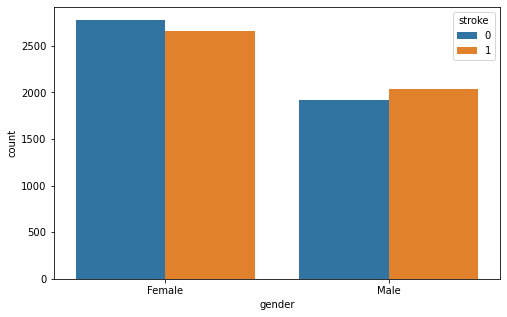

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=df,hue='stroke')

<AxesSubplot:xlabel='age', ylabel='Count'>

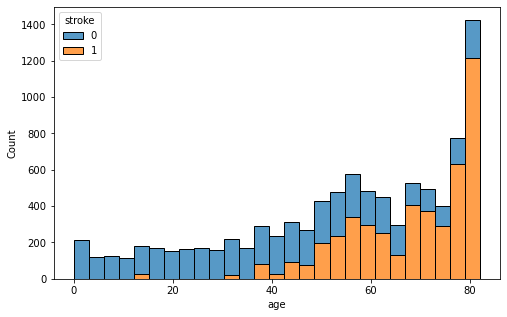

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(x='age',stat="count",data=df,hue='stroke',multiple="stack")

<AxesSubplot:xlabel='hypertension', ylabel='count'>

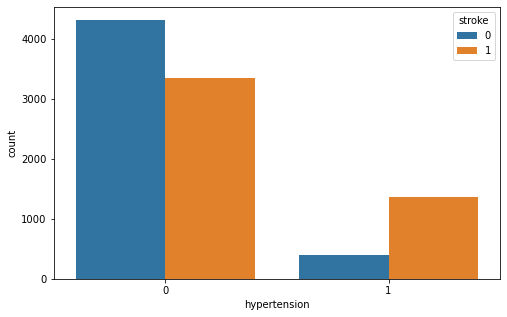

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='hypertension',data=df,hue='stroke')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

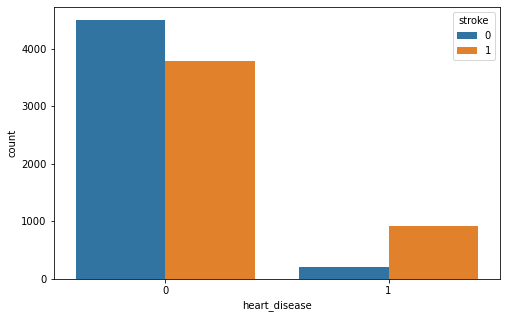

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='heart_disease',data=df,hue='stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

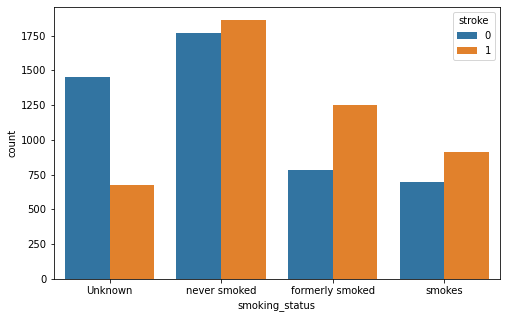

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='smoking_status',data=df,hue='stroke')

## Data Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for i in ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status']:
    df[i] = le.fit_transform(df[i])

In [22]:
cor = df.corr()

<AxesSubplot:>

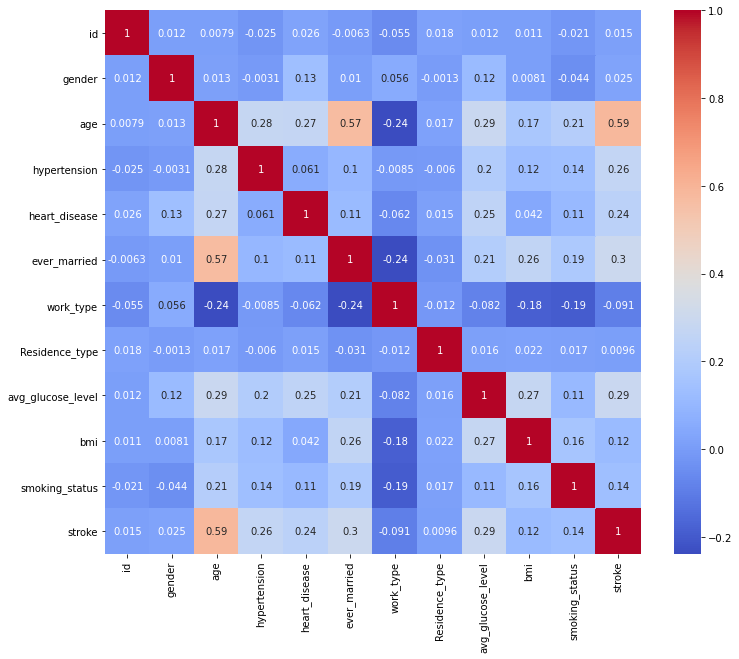

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [24]:
X= df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status']]
col = X.columns
y = df['stroke']

In [25]:
from sklearn.preprocessing import StandardScaler, normalize
X_scale = StandardScaler().fit_transform(X)
X_normalize = normalize(X_scale)

In [26]:
X = pd.DataFrame(X_normalize,columns=col)

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# MODELS 

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
lr_pred = lr.predict(X_test)

In [32]:
con_mat_lr = confusion_matrix(y_test,lr_pred)
report_lr = classification_report(y_test,lr_pred)
acc_lr = accuracy_score(y_test,lr_pred)

In [33]:
print("Accuracy Score:",acc_lr)

Accuracy Score: 0.7591876208897486


Confusion Matrix:


<AxesSubplot:>

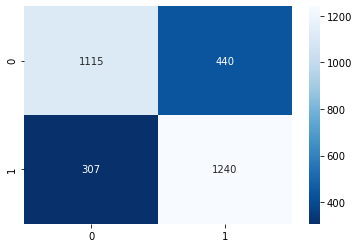

In [34]:
print("Confusion Matrix:")
sns.heatmap(con_mat_lr,annot=True,cmap='Blues_r',fmt='.5g')

In [35]:
print("Classification Report:")
print(report_lr)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1555
           1       0.74      0.80      0.77      1547

    accuracy                           0.76      3102
   macro avg       0.76      0.76      0.76      3102
weighted avg       0.76      0.76      0.76      3102



## DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=101) 
dt.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [37]:
dt_pred = dt.predict(X_test)

In [38]:
con_mat_dt = confusion_matrix(y_test,dt_pred)
report_dt = classification_report(y_test,dt_pred)
acc_dt = accuracy_score(y_test,dt_pred)

In [39]:
print("Accuracy Score:",acc_dt)

Accuracy Score: 0.9690522243713733


Confusion Matrix:


<AxesSubplot:>

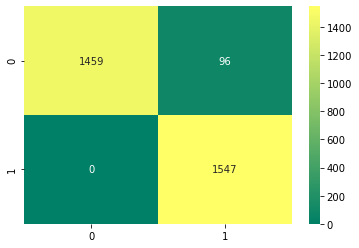

In [40]:
print("Confusion Matrix:")
sns.heatmap(con_mat_dt,annot=True,cmap='summer',fmt='.5g')

In [41]:
print("Classification Report:")
print(report_dt)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1555
           1       0.94      1.00      0.97      1547

    accuracy                           0.97      3102
   macro avg       0.97      0.97      0.97      3102
weighted avg       0.97      0.97      0.97      3102



## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [43]:
rf_pred = rf.predict(X_test)

In [44]:
con_mat_rf = confusion_matrix(y_test,rf_pred)
report_rf = classification_report(y_test,rf_pred)
acc_rf = accuracy_score(y_test,rf_pred)

In [45]:
print("Accuracy Score:",acc_rf)

Accuracy Score: 0.9890393294648614


Confusion Matrix:


<AxesSubplot:>

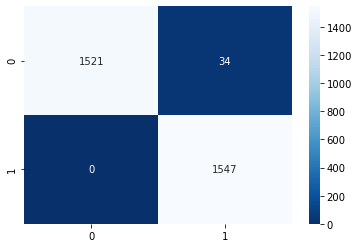

In [46]:
print("Confusion Matrix:")
sns.heatmap(con_mat_rf,annot=True,cmap='Blues_r',fmt='.5g')

In [47]:
print("Classification Report:")
print(report_rf)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1555
           1       0.98      1.00      0.99      1547

    accuracy                           0.99      3102
   macro avg       0.99      0.99      0.99      3102
weighted avg       0.99      0.99      0.99      3102



## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski') 
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [49]:
knn_pred = knn.predict(X_test)

In [50]:
con_mat_knn = confusion_matrix(y_test,knn_pred)
report_knn = classification_report(y_test,knn_pred)
acc_knn = accuracy_score(y_test,knn_pred)

In [51]:
print("Accuracy Score:",acc_knn)

Accuracy Score: 0.9284332688588007


Confusion Matrix:


<AxesSubplot:>

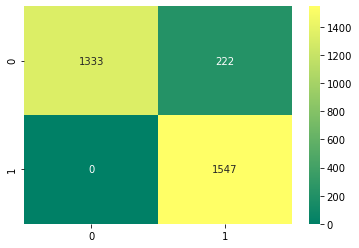

In [52]:
print("Confusion Matrix:")
sns.heatmap(con_mat_knn,annot=True,cmap='summer',fmt='.5g')

In [53]:
print("Classification Report:")
print(report_knn)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1555
           1       0.87      1.00      0.93      1547

    accuracy                           0.93      3102
   macro avg       0.94      0.93      0.93      3102
weighted avg       0.94      0.93      0.93      3102



## Naïve bayes model

In [54]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb.fit(X_train, y_train)

GaussianNB()

In [55]:
nb_pred = nb.predict(X_test)

In [56]:
con_mat_nb = confusion_matrix(y_test,nb_pred)
report_nb = classification_report(y_test,nb_pred)
acc_nb = accuracy_score(y_test,nb_pred)

In [57]:
print("Accuracy Score:",acc_nb)

Accuracy Score: 0.7366215344938749


Confusion Matrix:


<AxesSubplot:>

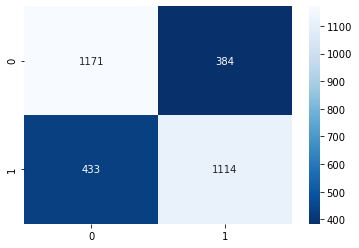

In [58]:
print("Confusion Matrix:")
sns.heatmap(con_mat_nb,annot=True,cmap='Blues_r',fmt='.5g')

In [59]:
print("Classification Report:")
print(report_nb)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1555
           1       0.74      0.72      0.73      1547

    accuracy                           0.74      3102
   macro avg       0.74      0.74      0.74      3102
weighted avg       0.74      0.74      0.74      3102

